In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing pandas for data analysis and numpy for mathematical solving
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Ridge_Regression_with_5datasets/Ecommerce/Ecommerce Customers.csv')

In [4]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender
0,kyang@diaz.org,"223 Love Trail Suite 831\nPort Jeffrey, IN 46849",OliveDrab,34.374258,15.126994,37.157624,5.377594,765.518462,Female
1,asilva@yahoo.com,USNV Johnson\nFPO AP 19026,Wheat,34.603311,12.207298,33.913847,6.922689,744.221867,Male
2,william82@gmail.com,"11143 Park Squares\nSamanthatown, UT 97073",SandyBrown,33.256335,13.858062,37.780265,5.976768,725.584814,Male
3,jeffrey54@mcdonald-williams.com,"297 Francis Valley\nSouth Lindsey, NY 13669-5367",Gainsboro,34.967610,13.919494,37.952013,5.066697,712.396327,Female
4,rhonda01@gmail.com,"939 Watson Run\nStaceyberg, VT 58376-0454",Orchid,34.385820,12.729720,36.232110,5.705941,708.935185,Female


In [5]:
data.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender
495,fischermonica@gmail.com,9847 Michael Plaza Suite 837\nLake Christopher...,Navy,32.529769,11.747732,36.939882,0.801516,298.762008,Male
496,morganorozco@hotmail.com,"0001 Mack Mill\nNorth Jennifer, NE 42021-5936",LightPink,30.492537,11.562936,35.976565,1.481617,282.471246,Male
497,brian51@cook.info,"0508 Terrance Cliff\nRebekahtown, NC 48724-8308",SaddleBrown,31.517122,10.745189,38.791235,1.428824,275.918421,Male
498,brandon77@richardson.com,"109 Jessica Manor\nNorth Patriciashire, PR 84726",GhostWhite,30.816201,11.851399,36.925043,1.084585,266.086341,Male
499,alexandra26@summers-davis.com,Unit 7032 Box 7016\nDPO AE 44749-2992,Navy,32.836941,10.256549,36.143908,0.789520,25006.670580,Male


In [6]:
data.shape

(500, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   Gender                500 non-null    object 
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


In [8]:
data.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Gender                  0
dtype: int64

In [9]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,548.814038
std,0.992563,0.994216,1.010489,0.999278,1098.792971
min,29.532429,8.508152,33.913847,0.269901,266.086341
25%,32.341822,11.388153,36.349257,2.930450,445.577927
50%,33.082008,11.983231,37.069367,3.533975,500.120199
75%,33.711985,12.753850,37.716432,4.126502,549.871479
max,36.139662,15.126994,40.005182,6.922689,25006.670580


In [10]:
data.describe(include=['O'])

,Email,Address,Avatar,Gender
count,500,500,500,500
unique,500,500,138,2
top,kyang@diaz.org,"223 Love Trail Suite 831\nPort Jeffrey, IN 46849",Teal,Male
freq,1,1,7,260


In [11]:
data = data.drop(columns = ['Email','Address','Avatar'],axis=1)

In [12]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender
0,34.374258,15.126994,37.157624,5.377594,765.518462,Female
1,34.603311,12.207298,33.913847,6.922689,744.221867,Male
2,33.256335,13.858062,37.780265,5.976768,725.584814,Male
3,34.967610,13.919494,37.952013,5.066697,712.396327,Female
4,34.385820,12.729720,36.232110,5.705941,708.935185,Female


In [13]:
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

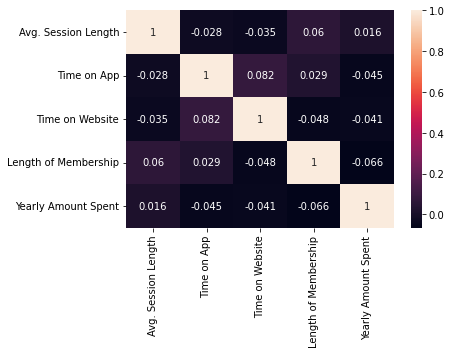

In [14]:
sns.heatmap(data.corr(),annot=True)

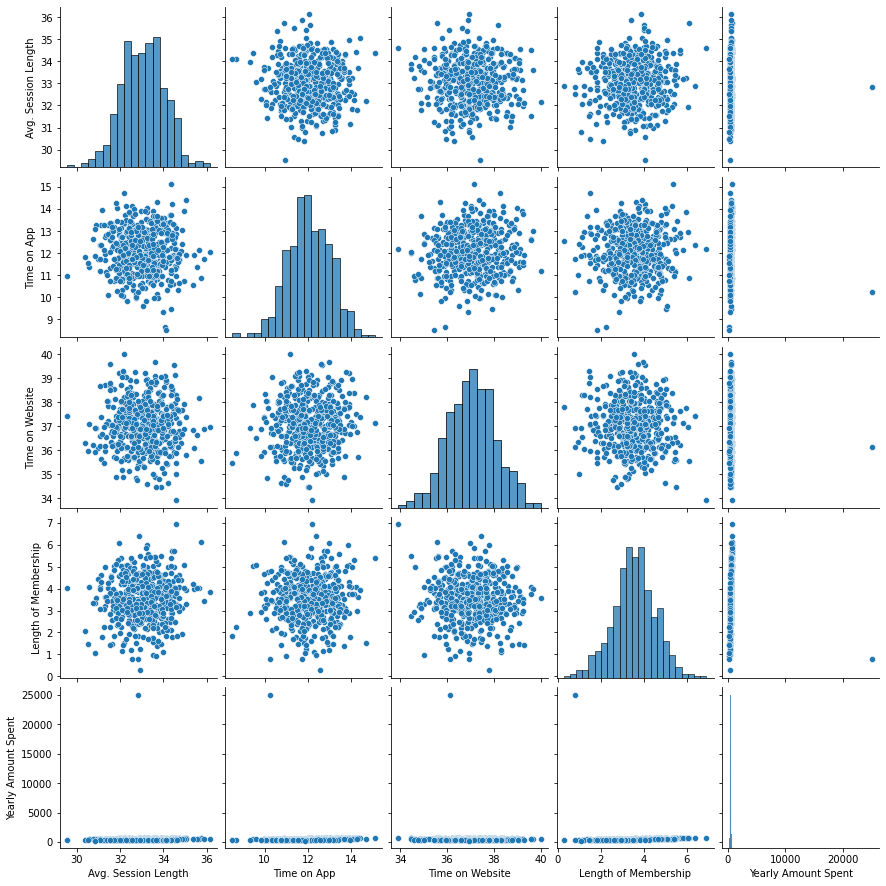

In [15]:
sns.pairplot(data)

<Axes: >

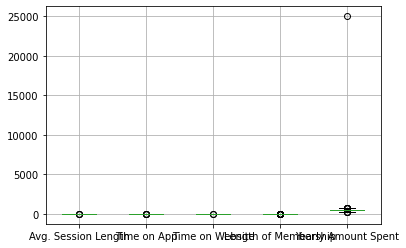

In [16]:
data.boxplot()

In [17]:
def iqr_capping(data,col):
  for i in col:

    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)

    iqr = q3-q1

    upper_whisker = q3 + (1.5*iqr)
    lower_whisker = q1 - (1.5*iqr)

    data[i] = np.where(data[i] > upper_whisker,upper_whisker,np.where(data[i] < lower_whisker,lower_whisker,data[i]))

In [18]:
data.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'Gender'],
      dtype='object')

In [19]:
names = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent']

In [20]:
iqr_capping(data,names)

<Axes: >

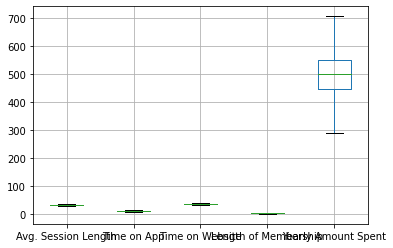

In [21]:
data.boxplot()

In [22]:
from scipy.stats import skew
for i in names:
  print(i)
  print(skew(data[i]))

Avg. Session Length
-0.011641066840183444
Time on App
-0.024098317694392832
Time on Website
0.019970356616114446
Length of Membership
-0.11470448387233778
Yearly Amount Spent
0.048625242167518304


In [23]:
from sklearn.preprocessing import LabelEncoder
for i in data.columns:
  if data[i].dtype == 'object':
    label_encoding = LabelEncoder()
    data[i] = label_encoding.fit_transform(data[i])

In [24]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Gender
0,34.374258,14.802394,37.157624,5.377594,706.311808,0
1,34.603311,12.207298,34.298495,5.920580,706.311808,1
2,33.256335,13.858062,37.780265,5.920580,706.311808,1
3,34.967610,13.919494,37.952013,5.066697,706.311808,0
4,34.385820,12.729720,36.232110,5.705941,706.311808,0


In [25]:
from sklearn.model_selection import train_test_split
X = data.drop(['Yearly Amount Spent'],axis=1)
y = data['Yearly Amount Spent']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=566)
print(X_train.shape)
print(X_test.shape)

(400, 5)
(100, 5)


In [26]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
data = standardizer.fit(data).transform(data)

In [27]:
import time
start_time = time.time()

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r1 = Ridge()
r1.fit(X_train,y_train)

pred_train_r1 = r1.predict(X_train)
print('train R^2:',r2_score(y_train,pred_train_r1))
print('train Mean Squared Error:',mean_squared_error(y_train,pred_train_r1))
print('train Mean Absolute Error:',mean_absolute_error(y_train,pred_train_r1))
print('-----------------------------------------')
pred_test_r1 = r1.predict(X_test)
print('test R^2:',r2_score(y_test,pred_test_r1))
print('test Mean Squared Error:',mean_squared_error(y_test,pred_test_r1))
print('test Mean Absolute Error:',mean_absolute_error(y_test,pred_test_r1))
print('-----------------------------------------')
end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train R^2: 0.9075587827505119
train Mean Squared Error: 553.823905517151
train Mean Absolute Error: 9.461358611086164
-----------------------------------------
test R^2: 0.9761667981903729
test Mean Squared Error: 154.46590928073883
test Mean Absolute Error: 9.356228066002139
-----------------------------------------
Time taken : 0.17261481285095215


In [28]:
r1.coef_

array([24.49580155, 35.31047167, -0.59878971, 57.19295276, -7.99256922])

In [29]:
start_time = time.time()

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.00001,0.001,0.01,0.1,1,10,100]}
tuning = GridSearchCV(r1, param_grid,cv=10)
tuning.fit(X_train,y_train)
print(tuning.best_params_)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

{'alpha': 1}
Time taken : 0.7431192398071289


In [30]:
r1 = Ridge(alpha=tuning.best_params_['alpha'])
r1.fit(X_train,y_train)

Ridge(alpha=1)

In [31]:
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
r1 = Ridge()
param_dist = {'alpha': uniform(0,10)}
random = RandomizedSearchCV(r1, param_distributions = param_dist,n_iter=100,cv=5)
random.fit(X_train,y_train)
print('best hyperparameters:',random.best_params_)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

best hyperparameters: {'alpha': 0.5885172475924161}
Time taken : 5.339195489883423


In [32]:
r1 = Ridge(alpha=random.best_params_['alpha'])
r1.fit(X_train,y_train)

Ridge(alpha=0.5885172475924161)

In [33]:
start_time = time.time()

from sklearn.ensemble import AdaBoostRegressor
r1 = Ridge(alpha=random.best_params_['alpha'])
ada = AdaBoostRegressor(estimator=r1,n_estimators=50,learning_rate=0.001)
ada.fit(X_train,y_train)

train_score = ada.score(X_train,y_train)
test_score = ada.score(X_test,y_test)
print('train r2:',train_score)
print('test r2:',test_score)

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)


train r2: 0.9075809842905795
test r2: 0.9764342848456353
Time taken : 0.4925687313079834


In [34]:
start_time = time.time()

from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(boosting_type='gbdt',objective='regression',num_leaves=31, learning_rate=0.05,n_estimators=20)
lgbm.fit(X_train,y_train)

lgbm_pred_train = lgbm.predict(X_train)
lgbm_pred_test = lgbm.predict(X_test)

print('train R^2:',r2_score(y_train,lgbm_pred_train))
print('train Mean Squared Error:',mean_squared_error(y_train,lgbm_pred_train))
print('train Mean Absolute Error:',mean_absolute_error(y_train,lgbm_pred_train))
print('-------------------------------------')
print('test R^2:',r2_score(y_test,lgbm_pred_test))
print('test Mean Squared Error:',mean_squared_error(y_test,lgbm_pred_test))
print('test Mean Absolute Error:',mean_absolute_error(y_test,lgbm_pred_test))

end_time = time.time()
execution_time = end_time - start_time
print("Time taken :", execution_time)

train R^2: 0.6911273953497709
train Mean Squared Error: 1850.484419227962
train Mean Absolute Error: 28.577368002090743
-------------------------------------
test R^2: 0.6974166969844625
test Mean Squared Error: 1961.0795648356725
test Mean Absolute Error: 32.57761327685395
Time taken : 1.420762062072754


In [35]:
start_time = time.time()

from xgboost import XGBRegressor
r1 = Ridge(alpha=random.best_params_['alpha'])
boosting = XGBRegressor()
boosting.fit(X_train,y_train)

xgb_pred_train = boosting.predict(X_train)
xgb_pred_test = boosting.predict(X_test)

print('train R^2:',r2_score(y_train,xgb_pred_train))

print('-------------------------------------')
print('test R^2:',r2_score(y_test,xgb_pred_test))


end_time = time.time()
execution_time = end_time - start_time
print('-------------------------------------')
print("Time taken :", execution_time)

train R^2: 0.9999783148508292
-------------------------------------
test R^2: 0.8632426618944093
-------------------------------------
Time taken : 0.45885729789733887
